# Data Analytics with Python Assignment 2 Notebook

This jupyter notebook is designed to complete a full analysis of a movie dataset for Canopy. Canopy is a boutique streaming service that intends to cater to viewers of French-Language movies. They seek advice on their business goals. Their goals include, but are not limited to:
- Making French-Language movies available to various age groups.
- Identfying the least tapped genres for advising French Filmmakers.
- Identifying how the scoring and runtime of movies released in France compares to those not released in France.

The general structure of the notebook is as follows: 
- Loading
- Examination of initial data
- Cleaning
- Analysis
- Visualisation

## Pre-Loading
Before loading any data, inspect the file using a text editor, such as notepad++.

The Movies dataset is a csv with headings.

In [1]:
# Import our Libraries
import pandas as pd # A powerful library for storing and manipulating large tables via the DataFrame
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np # A diverse library for comprehensive mathematical operations
import seaborn as sns # A useful library for the creation of visualisations
from matplotlib import pyplot as plt # For creating a dashboard of Seaborn visuals.
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Loading

Now we load our data onto a Pandas DataFrame.

In [2]:
# Load our data onto some DataFrames
data_raw_path = "./dataset/movies.csv"
data_raw = pd.read_csv(data_raw_path)

Now we check the DataFrame to ensure it loaded correctly

In [3]:
data_raw.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
0,Trigger Pals,1939,NaN,5.3,NaN,Sam Newfield,"Action,Adventure,Western",United States,English,59.0
1,One Way Astronaut: The Mars One Initiative,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Open Grave,2013,18+,6.2,18%,Gonzalo López-Gallego,"Horror,Mystery,Thriller","United States,Hungary",English,102.0
3,Metallica: Kill 'Em All to St. Anger - The Ult...,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Beyond the Pale,2014,NaN,7.4,NaN,Ja-Ann Wang,"Short,Drama",United States,English,11.0


## Examination of initial data

Let's look at the dataset in general, primarily to assess null value counts and potential issues with column value formating.

In [4]:
data_raw.describe(include="all")

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
count,15069,15069.000000,6609,14543.000000,4636,14396,14814,14672,14521,14533.000000
unique,15069,NaN,5,NaN,99,10397,1794,1204,1018,NaN
top,Field Freak,NaN,18+,NaN,100%,Jay Chapman,Drama,United States,English,NaN
freq,1,NaN,3124,NaN,365,34,1203,7865,9853,NaN
mean,NaN,2003.086734,NaN,5.907206,NaN,NaN,NaN,NaN,NaN,93.433978
std,NaN,20.592520,NaN,1.346995,NaN,NaN,NaN,NaN,NaN,28.536275
min,NaN,1913.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,2001.000000,NaN,5.100000,NaN,NaN,NaN,NaN,NaN,82.000000
50%,NaN,2012.000000,NaN,6.100000,NaN,NaN,NaN,NaN,NaN,92.000000
75%,NaN,2016.000000,NaN,6.900000,NaN,NaN,NaN,NaN,NaN,104.000000


In [5]:
print(data_raw["Age"].unique())

[nan '18+' '13+' '16+' 'all' '7+']


The column information for movies is as follows:

- Title: The title of the film. (String)

- Year: The year of release of the film. (Integer)

- Age: The age category of the film (Strings) ('18+' '13+' '16+' 'all' '7+')

- IMDb: The IMDb rating, between 0 and 10 (Float, 1 decimal)

- Rotten Tomatoes: The Rotten Tomatoe rating, expressed as a percentage. (String)

- Directors: The Directors of the film (String, comma seperators)

- Genres: The Genres of the film (String, comma seperators)

- Country: The Countries the film has been released in (String, comma seperators)

- Language: The available languages of the film (String, comma seperators)

- Runtime: The legnth of the movie, in minutes. (Integer)

## Cleaning

For the Null values, the approach will be to drop any Nulls in target columns that cannot be inferred and also represent a small portion of the overal data. These columns are Genres, Country, Language and IMDb.

In [6]:
data_raw_drop = data_raw.dropna(subset=["IMDb", "Genres", "Country", "Language"])
data_raw_drop.describe(include="all")

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
count,14148,14148.000000,6459,14148.000000,4585,13822,14148,14148,14148,13964.000000
unique,14148,NaN,5,NaN,99,9975,1757,1171,1001,NaN
top,Field Freak,NaN,18+,NaN,100%,Jay Chapman,Drama,United States,English,NaN
freq,1,NaN,3084,NaN,350,33,1142,7582,9582,NaN
mean,NaN,2002.531029,NaN,5.904191,NaN,NaN,NaN,NaN,NaN,94.011744
std,NaN,20.884173,NaN,1.341961,NaN,NaN,NaN,NaN,NaN,28.082350
min,NaN,1913.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,1999.000000,NaN,5.100000,NaN,NaN,NaN,NaN,NaN,83.000000
50%,NaN,2011.000000,NaN,6.100000,NaN,NaN,NaN,NaN,NaN,92.000000
75%,NaN,2016.000000,NaN,6.900000,NaN,NaN,NaN,NaN,NaN,105.000000


This strip only impacted ~800 titles. Leaving a database with ~14,000 titles, each with an IMDb rating and a valid Genre, Country and Language listing.

Next, converting the Rotten Tomatoes values to a value similar to IMDb, by first stripping the '%' and then dividing by 100, to make it match the same scale IMDb uses.

In [7]:
data_raw_drop["Rotten Tomatoes"].fillna("%", inplace=True)

In [8]:
data_raw_drop['Rotten Tomatoes'] = data_raw_drop['Rotten Tomatoes'].map(lambda x: x.rstrip("%"))
data_raw_drop["Rotten Tomatoes"] = data_raw_drop["Rotten Tomatoes"].fillna("0")
data_raw_drop["Rotten Tomatoes"] = pd.to_numeric(data_raw_drop["Rotten Tomatoes"])
data_raw_drop["Rotten Tomatoes"] = data_raw_drop["Rotten Tomatoes"]/10
data_raw_drop.describe(include='all')

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
count,14148,14148.000000,6459,14148.000000,4585.000000,13822,14148,14148,14148,13964.000000
unique,14148,NaN,5,NaN,NaN,9975,1757,1171,1001,NaN
top,Field Freak,NaN,18+,NaN,NaN,Jay Chapman,Drama,United States,English,NaN
freq,1,NaN,3084,NaN,NaN,33,1142,7582,9582,NaN
mean,NaN,2002.531029,NaN,5.904191,6.530578,NaN,NaN,NaN,NaN,94.011744
std,NaN,20.884173,NaN,1.341961,2.661761,NaN,NaN,NaN,NaN,28.082350
min,NaN,1913.000000,NaN,0.000000,0.200000,NaN,NaN,NaN,NaN,1.000000
25%,NaN,1999.000000,NaN,5.100000,4.400000,NaN,NaN,NaN,NaN,83.000000
50%,NaN,2011.000000,NaN,6.100000,7.100000,NaN,NaN,NaN,NaN,92.000000
75%,NaN,2016.000000,NaN,6.900000,8.800000,NaN,NaN,NaN,NaN,105.000000


The intention of determining a singuar score is to take the average value between IMDb and Rotten Tomatoes. If the movie lacks a Rotten Tomatoes value, then the average will just be the IMDb value. Using fillna will assist in completing the Rotten Tomatoes column.

In [9]:
data_raw_drop["Rotten Tomatoes"].fillna(data_raw_drop["IMDb"], inplace=True)

Now we'll create three new columns. The first is the average score across both IMDb and Rotten Tommatoes, and the second is whether the film's country is "France" or not and the third is whether the film contains the French Language.

It's worth noting that the "France" column will pick up any film that has France listed as a Country, which does include movies not made in France but released in France. Since there is no reliable way to automatically ascertain the singular country of origin for a film, we'll apply this blanket filter. The alternative is to select films that only have France listed as a Country but that would exclude any French film that did get released outside of France which would arguably be worse than the first filter option.

Similarly, the "French" column will pick up only films that have French as an "Available language of the movie" which the accompanying documentation of the dataset does not specify as subtitles or dubbed audio. As Canopy are currently not worried about if the language is subtitles or dubbed audio, this should suffice.

In [10]:
data_raw_drop["Score"] = (data_raw_drop["IMDb"]+data_raw_drop["Rotten Tomatoes"])/2
data_raw_drop["France"] = data_raw_drop["Country"].str.contains('France', regex=False)
data_raw_drop["French"] = data_raw_drop["Language"].str.contains('French', regex=False)

To make use of the Genres column, we'll turn it into a list, rather than a single string, divided by commas.

In [11]:
data_raw_drop["Genres"]=data_raw_drop["Genres"].str.split(pat=r',')

We'll now generate a column called "Multi" which identifies any movie that has multiple genres.

In [12]:
data_raw_drop["Multi"] = (data_raw_drop["Genres"].str.len() > 1)

In [13]:
data_raw_drop.describe(include="all")

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Score,France,French,Multi
count,14148,14148.000000,6459,14148.000000,14148.000000,13822,14148,14148,14148,13964.000000,14148.000000,14148,14148,14148
unique,14148,NaN,5,NaN,NaN,9975,1757,1171,1001,NaN,NaN,2,2,2
top,Field Freak,NaN,18+,NaN,NaN,Jay Chapman,[Drama],United States,English,NaN,NaN,False,False,True
freq,1,NaN,3084,NaN,NaN,33,1142,7582,9582,NaN,NaN,13499,13444,9982
mean,NaN,2002.531029,NaN,5.904191,5.953230,NaN,NaN,NaN,NaN,94.011744,5.928711,NaN,NaN,NaN
std,NaN,20.884173,NaN,1.341961,1.956076,NaN,NaN,NaN,NaN,28.082350,1.557374,NaN,NaN,NaN
min,NaN,1913.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN
25%,NaN,1999.000000,NaN,5.100000,4.700000,NaN,NaN,NaN,NaN,83.000000,4.900000,NaN,NaN,NaN
50%,NaN,2011.000000,NaN,6.100000,6.000000,NaN,NaN,NaN,NaN,92.000000,6.075000,NaN,NaN,NaN
75%,NaN,2016.000000,NaN,6.900000,7.200000,NaN,NaN,NaN,NaN,105.000000,7.100000,NaN,NaN,NaN


## Analysis
To begin, we'll start by determining the average runtime and rating of movies from France. We'll save this information into its own dataframe for later visualisations.

In [14]:
france_average = data_raw_drop.groupby(["France"]).mean()
france_average

,Year,IMDb,Rotten Tomatoes,Runtime,Score,French,Multi
France,,,,,,,
False,2002.373509,5.881873,5.923520,93.648671,5.902696,0.029113,0.703978
True,2005.807396,6.368413,6.571186,101.496904,6.469800,0.479199,0.738059


We can see that France make longer films on average, by just approximately 10 minutes, and score better than average, by about 0.5.

Using the columns "Multi" and "France" we'll now create a dataframe that contains only films that were released in France and also contain multiple genres.

In [15]:
multi_french = data_raw_drop.loc[(data_raw_drop["Multi"] == 1) & data_raw_drop["France"] == 1]
multi_french

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Score,France,French,Multi
37,Sherlock Gnomes,2018,7+,5.2,2.7,John Stevenson,"[Animation, Adventure, Comedy, Family, Fantasy...","United Kingdom,United States,India,Canada,Fran...","English,Mandarin",86.0,3.95,True,False,True
78,Girl on a Bicycle,2013,18+,6.2,0.8,Jeremy Leven,"[Comedy, Drama, Romance]","Germany,France","English,French,German,Italian",101.0,3.50,True,True,True
109,Razzia,2018,NaN,6.2,4.4,Rose Bosch,"[Drama, History, War]","France,Germany,Hungary","French,German,Yiddish",115.0,5.30,True,True,True
169,The Soloist,2009,13+,6.7,5.7,Joe Wright,"[Biography, Drama, Music]","United Kingdom,France,United States",English,117.0,6.20,True,False,True
228,Planetarium,2016,NaN,4.6,1.6,Rebecca Zlotowski,"[Drama, Fantasy, Mystery, Romance, Thriller]","France,Belgium","English,French",105.0,3.10,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14851,Point Blank,2019,18+,5.7,3.8,Joe Lynch,"[Action, Thriller]","France,United States",English,86.0,4.75,True,False,True
14894,Custer of the West,1967,all,5.8,2.5,Robert Siodmak,"[Biography, Drama, History, War, Western]","United Kingdom,France,Spain,United States",English,140.0,4.15,True,False,True
14948,A Spell to Ward Off the Darkness,2013,7+,6.2,9.5,"Ben Rivers,Ben Russell","[Documentary, Music]","France,Estonia,Germany",English,98.0,7.85,True,False,True
15029,Made in France,2015,18+,6.2,6.2,Nicolas Boukhrief,"[Crime, Drama, Thriller]",France,French,89.0,6.20,True,True,True


Similarly, we'll create a dataframe that contains all films that were released in France.

In [16]:
data_france = data_raw_drop.loc[data_raw_drop["France"] == True]
data_france

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Score,France,French,Multi
7,Manderlay,2005,NaN,7.3,5.0,Lars von Trier,[Drama],"Denmark,Sweden,Netherlands,France,Germany,Unit...",English,139.0,6.15,True,False,False
31,Mystery of the Pink Dolphin,2015,NaN,7.1,7.1,Eric Ellena,[Documentary],"France,Brazil","French,English,Portuguese,Dutch",52.0,7.10,True,True,False
37,Sherlock Gnomes,2018,7+,5.2,2.7,John Stevenson,"[Animation, Adventure, Comedy, Family, Fantasy...","United Kingdom,United States,India,Canada,Fran...","English,Mandarin",86.0,3.95,True,False,True
49,My Revolution,2016,NaN,3.5,3.5,Ramzi Ben Sliman,[Drama],France,French,80.0,3.50,True,True,False
78,Girl on a Bicycle,2013,18+,6.2,0.8,Jeremy Leven,"[Comedy, Drama, Romance]","Germany,France","English,French,German,Italian",101.0,3.50,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14851,Point Blank,2019,18+,5.7,3.8,Joe Lynch,"[Action, Thriller]","France,United States",English,86.0,4.75,True,False,True
14894,Custer of the West,1967,all,5.8,2.5,Robert Siodmak,"[Biography, Drama, History, War, Western]","United Kingdom,France,Spain,United States",English,140.0,4.15,True,False,True
14948,A Spell to Ward Off the Darkness,2013,7+,6.2,9.5,"Ben Rivers,Ben Russell","[Documentary, Music]","France,Estonia,Germany",English,98.0,7.85,True,False,True
15029,Made in France,2015,18+,6.2,6.2,Nicolas Boukhrief,"[Crime, Drama, Thriller]",France,French,89.0,6.20,True,True,True


We'll gain the total counts of Genres and Age groups for any film with the French Language and save them to their own Series.

In [17]:
Genre_Totals = data_raw_drop["Genres"].where(data_raw_drop["French"]==True).explode().value_counts()
Genre_Totals

Drama          422
Comedy         171
Thriller       157
Romance        155
Action         101
Adventure       96
Documentary     94
Crime           83
Mystery         73
Family          63
History         62
Biography       59
Fantasy         57
War             54
Horror          44
Animation       42
Sci-Fi          37
Music           29
Musical         19
Sport           11
Western         10
Short            6
News             4
Name: Genres, dtype: int64

In [18]:
Age_Totals = data_raw_drop["Age"].where(data_raw_drop["French"]==True).value_counts()
Age_Totals

18+    164
13+     73
7+      66
all     27
16+     13
Name: Age, dtype: int64

## Visualisation
Now we'll visualise our data. We'll create an empty matplotlib 2 by 2 grid for later insertion of our Seaborn plots for our dashboard.


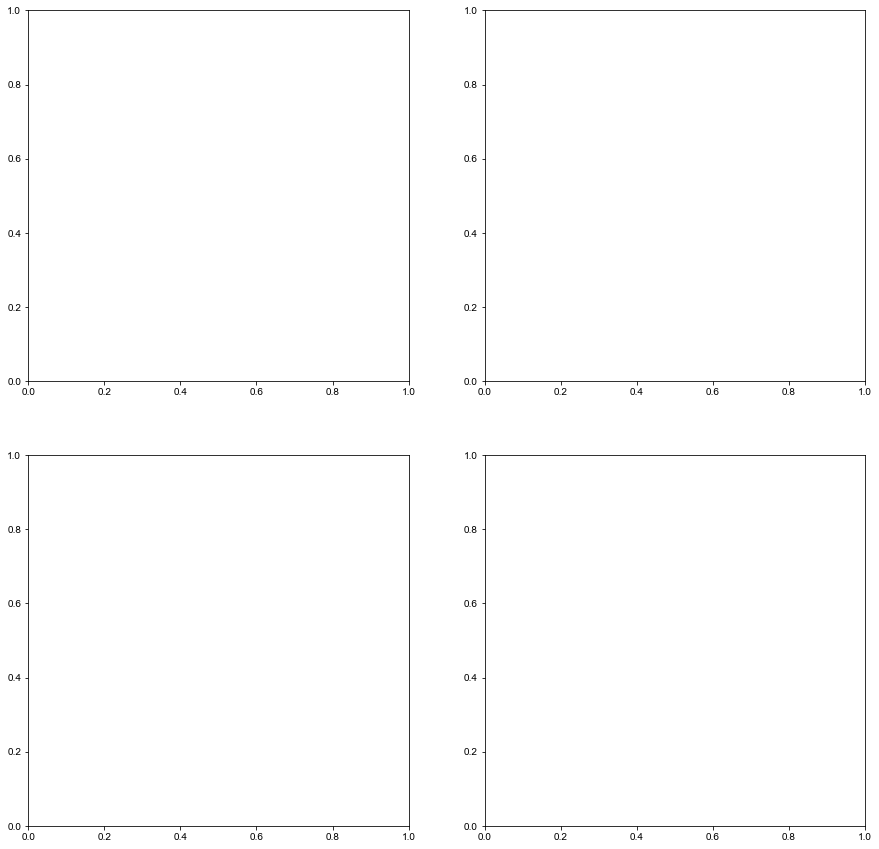

In [19]:
fig, axes = plt.subplots(2,2, figsize = (15,15))
sns.set_style('darkgrid') 

We'll make a boxplot of the scores of films released in France and not in France

In [20]:
sns.set(rc={'figure.figsize':(10,8)})
france_score = sns.boxplot(
    data=data_raw_drop,
    x="France",
    y="Score",
    ax = axes[0,0]
)
france_score.set_xlabel("Was the film released in France")
france_score.set_ylabel("Score (Out of 10)")
france_score.set_title("Scores of films released in France vs not released in France")

Text(0.5, 1.0, 'Scores of films released in France vs not released in France')

We'll then create a barplot of the age category counts

In [21]:
age_category = sns.barplot(Age_Totals.index, Age_Totals.values, ax=axes[0,1])
age_category.set_xlabel("Age Category")
age_category.set_ylabel("Count of Film")
age_category.set_title("Number of Films by Age Category")

Text(0.5, 1.0, 'Number of Films by Age Category')

We'll create a second barplot, with counts of genres

In [22]:
genre_count = sns.barplot(Genre_Totals.index, Genre_Totals.values, ax=axes[1,0])
genre_count.set_xlabel("Genre")
genre_count.set_ylabel("Count of Film")
genre_count.set_title("Number of Films by Genre")
genre_count.tick_params(axis='x', rotation=90)

And finally we'll create a boxplot of movie runtime, for movies released in France against movies not released in France.

There were a number of outliers that skewed the data enough to impact the visual usefullness, and so a filter is applied to cut any movie that ran longer than 5 hours.

In [23]:
movie_length_trim = data_raw_drop.loc[data_raw_drop["Runtime"] < 300]
movie_length = sns.boxplot(
               data=movie_length_trim,
               y="Runtime",
               x="France",
               ax = axes[1,1])
movie_length.set_xlabel("Was the film released in France")
movie_length.set_ylabel("Runtime(Minutes)")
movie_length.set_title("Runtime of movies released in France vs not released in France")

Text(0.5, 1.0, 'Runtime of movies released in France vs not released in France')

And now we plot our finished figure

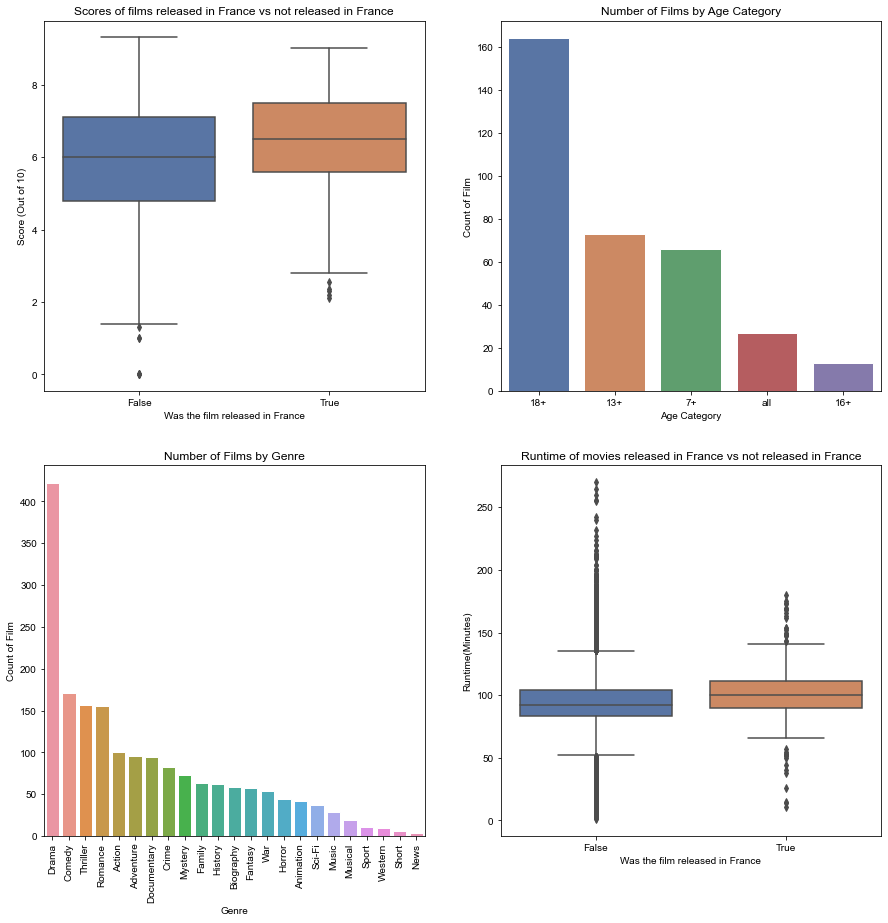

In [24]:
fig

Movies released in France score better and run longer on average. The older age category is the most represented and the family and younger age categories are the least represented. Drama, Comedy, Thriller and Romance are the most represented genres while Sci-Fi, Music/Musical, Sport and Western are the least represented genres.

In [25]:
#Uncomment to save figure to file.
#fig.savefig("Dashboard.png")